<a href="https://colab.research.google.com/github/NANA0904/pagedown/blob/main/Breast_Cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Random Forest
from sklearn.ensemble import RandomForestClassifier
# K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier

#Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier
# XGBClassifier
from xgboost import XGBClassifier
#AdaBoostClassifier
from sklearn.ensemble import AdaBoostClassifier
#LogisticRegression
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Masters Thesis/Breast Cancer/SEER_Breast_Cancer_2020.csv", delimiter=';')
df.head()

,Age recode with <1 year olds,Year of birth,Sequence number,Year of diagnosis,Primary Site - labeled,Laterality,Reason no cancer-directed surgery,Histology recode - broad groupings,ER Status Recode Breast Cancer (1990+),PR Status Recode Breast Cancer (1990+),Survival months,Breast - Adjusted AJCC 6th T (1988-2015),Breast - Adjusted AJCC 6th N (1988-2015),Breast - Adjusted AJCC 6th M (1988-2015),Breast - Adjusted AJCC 6th Stage (1988-2015)
0,60-64 years,1910,One primary only,1975,"C50.9-Breast, NOS",Left - origin of primary,Surgery performed,8500-8549: ductal and lobular neoplasms,Not 1990+ Breast,Not 1990+ Breast,162.0,Blank(s),Blank(s),Blank(s),Blank(s)
1,35-39 years,1951,One primary only,1990,C50.4-Upper-outer quadrant of breast,Right - origin of primary,Surgery performed,8500-8549: ductal and lobular neoplasms,Positive,Positive,37.0,T1c,N0,M0,I
2,55-59 years,1934,One primary only,1991,C50.4-Upper-outer quadrant of breast,Left - origin of primary,Surgery performed,8500-8549: ductal and lobular neoplasms,Positive,Positive,26.0,TX Adjusted,NX Adjusted,M0,UNK Stage
3,60-64 years,1927,One primary only,1989,C50.2-Upper-inner quadrant of breast,Right - origin of primary,Surgery performed,8500-8549: ductal and lobular neoplasms,Not 1990+ Breast,Not 1990+ Breast,20.0,T2,N1,M0,IIB
4,70-74 years,1907,One primary only,1982,C50.4-Upper-outer quadrant of breast,Left - origin of primary,Surgery performed,8500-8549: ductal and lobular neoplasms,Not 1990+ Breast,Not 1990+ Breast,116.0,Blank(s),Blank(s),Blank(s),Blank(s)


In [ ]:
df.columns

Index(['Age recode with <1 year olds', 'Year of birth', 'Sequence number',
       'Year of diagnosis', 'Primary Site - labeled', 'Laterality',
       'Reason no cancer-directed surgery',
       'Histology recode - broad groupings',
       'ER Status Recode Breast Cancer (1990+)',
       'PR Status Recode Breast Cancer (1990+)', 'Survival months',
       'Breast - Adjusted AJCC 6th T (1988-2015)',
       'Breast - Adjusted AJCC 6th N (1988-2015)',
       'Breast - Adjusted AJCC 6th M (1988-2015)',
       'Breast - Adjusted AJCC 6th Stage (1988-2015)'],
      dtype='object')

In [ ]:
#Compute the age at time of diagnosis:


df['Age at Diagnosis'] = df['Year of diagnosis'] - df['Year of birth']
df['Age at Diagnosis']

0         65
1         39
2         57
3         62
4         75
          ..
172563    81
172564    59
172565    68
172566    83
172567    67
Name: Age at Diagnosis, Length: 172568, dtype: int64

In [ ]:
#Compute the age of each patient (given in nominal way in the data set):
age_recode_map = {
    '60-64 years': 62,
    '35-39 years': 37,
    '55-59 years': 57,
    '70-74 years': 72,
    '50-54 years': 52,
    '80-84 years': 82,
    '40-44 years': 42,
    '45-49 years': 47,
    '30-34 years': 32,
    '75-79 years': 77,
    '25-29 years': 27,
    '65-69 years': 67,
    '85+ years': 90,  # Adjusted to 90 for simplicity
    '20-24 years': 22,
    '15-19 years': 17
}
df['Age'] = df['Age recode with <1 year olds'].map(age_recode_map)
df['Age']


0         62
1         37
2         57
3         62
4         72
          ..
172563    82
172564    57
172565    67
172566    82
172567    67
Name: Age, Length: 172568, dtype: int64

In [ ]:
#Filter all cases in which the ER and PR status is unknown (Not 1990+ Breast) Recode the column "Laterality" into the following: left, right and two-sided :

df_filtered = df[(df['ER Status Recode Breast Cancer (1990+)'] == 'Not 1990+ Breast') &
                 (df['PR Status Recode Breast Cancer (1990+)'] == 'Not 1990+ Breast')]

df_filtered.head()

,Age recode with <1 year olds,Year of birth,Sequence number,Year of diagnosis,Primary Site - labeled,Laterality,Reason no cancer-directed surgery,Histology recode - broad groupings,ER Status Recode Breast Cancer (1990+),PR Status Recode Breast Cancer (1990+),Survival months,Breast - Adjusted AJCC 6th T (1988-2015),Breast - Adjusted AJCC 6th N (1988-2015),Breast - Adjusted AJCC 6th M (1988-2015),Breast - Adjusted AJCC 6th Stage (1988-2015),Age at Diagnosis,Age
0,60-64 years,1910,One primary only,1975,"C50.9-Breast, NOS",Left - origin of primary,Surgery performed,8500-8549: ductal and lobular neoplasms,Not 1990+ Breast,Not 1990+ Breast,162.0,Blank(s),Blank(s),Blank(s),Blank(s),65,62
3,60-64 years,1927,One primary only,1989,C50.2-Upper-inner quadrant of breast,Right - origin of primary,Surgery performed,8500-8549: ductal and lobular neoplasms,Not 1990+ Breast,Not 1990+ Breast,20.0,T2,N1,M0,IIB,62,62
4,70-74 years,1907,One primary only,1982,C50.4-Upper-outer quadrant of breast,Left - origin of primary,Surgery performed,8500-8549: ductal and lobular neoplasms,Not 1990+ Breast,Not 1990+ Breast,116.0,Blank(s),Blank(s),Blank(s),Blank(s),75,72
5,60-64 years,1913,1st of 2 or more primaries,1977,C50.8-Overlapping lesion of breast,Left - origin of primary,Surgery performed,8500-8549: ductal and lobular neoplasms,Not 1990+ Breast,Not 1990+ Breast,208.0,Blank(s),Blank(s),Blank(s),Blank(s),64,62
6,50-54 years,1934,1st of 2 or more primaries,1986,"C50.9-Breast, NOS",Left - origin of primary,Surgery performed,8500-8549: ductal and lobular neoplasms,Not 1990+ Breast,Not 1990+ Breast,153.0,Blank(s),Blank(s),Blank(s),Blank(s),52,52


In [ ]:
#Recode the column "Laterality" into the following: left, right and two-sided :

# Recode the column "Laterality" into left, right, and two-sided
laterality_map = {
    'Left - origin of primary': 'left',
    'Right - origin of primary': 'right',
    'Bilateral involvement, lateral origin unknown': 'two-sided'
    # Add mappings for other values if needed
}
df['Laterality Recoded'] = df['Laterality'].map(laterality_map)
df['Laterality Recoded']

0          left
1         right
2          left
3         right
4          left
          ...  
172563     left
172564     left
172565    right
172566     left
172567     left
Name: Laterality Recoded, Length: 172568, dtype: object

In [ ]:
#Filter out cases that are later than 2011:
df = df[df['Year of diagnosis'] <= 2011]
df

,Age recode with <1 year olds,Year of birth,Sequence number,Year of diagnosis,Primary Site - labeled,Laterality,Reason no cancer-directed surgery,Histology recode - broad groupings,ER Status Recode Breast Cancer (1990+),PR Status Recode Breast Cancer (1990+),Survival months,Breast - Adjusted AJCC 6th T (1988-2015),Breast - Adjusted AJCC 6th N (1988-2015),Breast - Adjusted AJCC 6th M (1988-2015),Breast - Adjusted AJCC 6th Stage (1988-2015),Age at Diagnosis,Age,Laterality Recoded
0,60-64 years,1910,One primary only,1975,"C50.9-Breast, NOS",Left - origin of primary,Surgery performed,8500-8549: ductal and lobular neoplasms,Not 1990+ Breast,Not 1990+ Breast,162.0,Blank(s),Blank(s),Blank(s),Blank(s),65,62,left
1,35-39 years,1951,One primary only,1990,C50.4-Upper-outer quadrant of breast,Right - origin of primary,Surgery performed,8500-8549: ductal and lobular neoplasms,Positive,Positive,37.0,T1c,N0,M0,I,39,37,right
2,55-59 years,1934,One primary only,1991,C50.4-Upper-outer quadrant of breast,Left - origin of primary,Surgery performed,8500-8549: ductal and lobular neoplasms,Positive,Positive,26.0,TX Adjusted,NX Adjusted,M0,UNK Stage,57,57,left
3,60-64 years,1927,One primary only,1989,C50.2-Upper-inner quadrant of breast,Right - origin of primary,Surgery performed,8500-8549: ductal and lobular neoplasms,Not 1990+ Breast,Not 1990+ Breast,20.0,T2,N1,M0,IIB,62,62,right
4,70-74 years,1907,One primary only,1982,C50.4-Upper-outer quadrant of breast,Left - origin of primary,Surgery performed,8500-8549: ductal and lobular neoplasms,Not 1990+ Breast,Not 1990+ Breast,116.0,Blank(s),Blank(s),Blank(s),Blank(s),75,72,left
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172542,60-64 years,1946,One primary only,2010,"C50.9-Breast, NOS","Paired site, but no information concerning lat...",Surgery performed,"8010-8049: epithelial neoplasms, NOS",Unknown,Unknown,77.0,TX Adjusted,NX Adjusted,MX,UNK Stage,64,62,NaN
172543,50-54 years,1951,One primary only,2005,"C50.9-Breast, NOS",Right - origin of primary,Surgery performed,"8010-8049: epithelial neoplasms, NOS",Positive,Positive,120.0,T1c,N0,M0,I,54,52,right
172545,60-64 years,1940,One primary only,2004,"C50.9-Breast, NOS",Right - origin of primary,Surgery performed,8500-8549: ductal and lobular neoplasms,Unknown,Unknown,151.0,TX Adjusted,NX Adjusted,MX,UNK Stage,64,62,right
172561,65-69 years,1945,One primary only,2010,"C50.9-Breast, NOS","Paired site, but no information concerning lat...",Not recommended,"8010-8049: epithelial neoplasms, NOS",Positive,Positive,69.0,"Any T, Mets",N0,M1,IV,65,67,NaN


In [ ]:
#Classify patients as "healed" or "not healed"
df['Healing Status'] = df['Survival months'].apply(lambda x: 'healed' if x > 60 else 'not healed')
df

,Age recode with <1 year olds,Year of birth,Sequence number,Year of diagnosis,Primary Site - labeled,Laterality,Reason no cancer-directed surgery,Histology recode - broad groupings,ER Status Recode Breast Cancer (1990+),PR Status Recode Breast Cancer (1990+),Survival months,Breast - Adjusted AJCC 6th T (1988-2015),Breast - Adjusted AJCC 6th N (1988-2015),Breast - Adjusted AJCC 6th M (1988-2015),Breast - Adjusted AJCC 6th Stage (1988-2015),Age at Diagnosis,Age,Laterality Recoded,Healing Status
0,60-64 years,1910,One primary only,1975,"C50.9-Breast, NOS",Left - origin of primary,Surgery performed,8500-8549: ductal and lobular neoplasms,Not 1990+ Breast,Not 1990+ Breast,162.0,Blank(s),Blank(s),Blank(s),Blank(s),65,62,left,healed
1,35-39 years,1951,One primary only,1990,C50.4-Upper-outer quadrant of breast,Right - origin of primary,Surgery performed,8500-8549: ductal and lobular neoplasms,Positive,Positive,37.0,T1c,N0,M0,I,39,37,right,not healed
2,55-59 years,1934,One primary only,1991,C50.4-Upper-outer quadrant of breast,Left - origin of primary,Surgery performed,8500-8549: ductal and lobular neoplasms,Positive,Positive,26.0,TX Adjusted,NX Adjusted,M0,UNK Stage,57,57,left,not healed
3,60-64 years,1927,One primary only,1989,C50.2-Upper-inner quadrant of breast,Right - origin of primary,Surgery performed,8500-8549: ductal and lobular neoplasms,Not 1990+ Breast,Not 1990+ Breast,20.0,T2,N1,M0,IIB,62,62,right,not healed
4,70-74 years,1907,One primary only,1982,C50.4-Upper-outer quadrant of breast,Left - origin of primary,Surgery performed,8500-8549: ductal and lobular neoplasms,Not 1990+ Breast,Not 1990+ Breast,116.0,Blank(s),Blank(s),Blank(s),Blank(s),75,72,left,healed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172542,60-64 years,1946,One primary only,2010,"C50.9-Breast, NOS","Paired site, but no information concerning lat...",Surgery performed,"8010-8049: epithelial neoplasms, NOS",Unknown,Unknown,77.0,TX Adjusted,NX Adjusted,MX,UNK Stage,64,62,NaN,healed
172543,50-54 years,1951,One primary only,2005,"C50.9-Breast, NOS",Right - origin of primary,Surgery performed,"8010-8049: epithelial neoplasms, NOS",Positive,Positive,120.0,T1c,N0,M0,I,54,52,right,healed
172545,60-64 years,1940,One primary only,2004,"C50.9-Breast, NOS",Right - origin of primary,Surgery performed,8500-8549: ductal and lobular neoplasms,Unknown,Unknown,151.0,TX Adjusted,NX Adjusted,MX,UNK Stage,64,62,right,healed
172561,65-69 years,1945,One primary only,2010,"C50.9-Breast, NOS","Paired site, but no information concerning lat...",Not recommended,"8010-8049: epithelial neoplasms, NOS",Positive,Positive,69.0,"Any T, Mets",N0,M1,IV,65,67,NaN,healed


In [ ]:
# Check the distribution of "healed" and "not healed" patients
healing_status_counts = df['Healing Status'].value_counts()
healing_status_counts

Healing Status
not healed    97881
healed        60884
Name: count, dtype: int64

In [ ]:
# Are the groups unbalanced?
distribution = df['Healing Status'].value_counts()

# Calculate the imbalance ratio
imbalance_ratio = distribution['healed'] / distribution['not healed']

# Display the distribution and imbalance ratio
print("Distribution:")
print(distribution)
print("Imbalance Ratio: ", imbalance_ratio)

Distribution:
Healing Status
not healed    97881
healed        60884
Name: count, dtype: int64
Imbalance Ratio:  0.6220206168715072


<Figure size 1000x600 with 0 Axes>

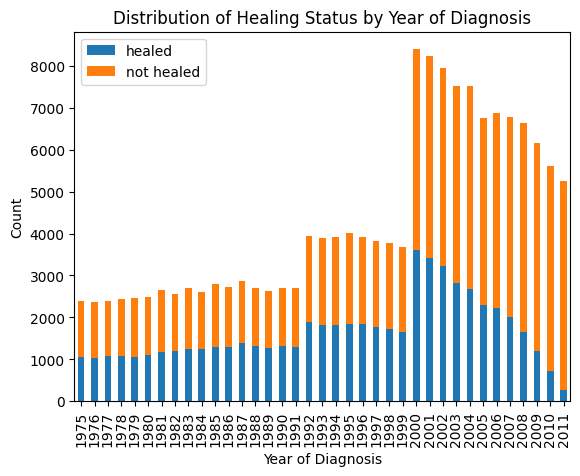

In [ ]:
# Create a bar plot showing the count of healed and not healed patients for each year
plt.figure(figsize=(10, 6))
df.groupby(['Year of diagnosis', 'Healing Status']).size().unstack().plot(kind='bar', stacked=True)
plt.xlabel('Year of Diagnosis')
plt.ylabel('Count')
plt.title('Distribution of Healing Status by Year of Diagnosis')
plt.legend(loc='upper left')
plt.show()

In [ ]:
yearly_proportions = df.groupby('Year of diagnosis')['Healing Status'].value_counts(normalize=True).unstack()
print(yearly_proportions)

Healing Status       healed  not healed
Year of diagnosis                      
1975               0.439178    0.560822
1976               0.439355    0.560645
1977               0.450898    0.549102
1978               0.436453    0.563547
1979               0.434162    0.565838
1980               0.443773    0.556227
1981               0.445113    0.554887
1982               0.465700    0.534300
1983               0.458179    0.541821
1984               0.481168    0.518832
1985               0.466332    0.533668
1986               0.475229    0.524771
1987               0.485017    0.514983
1988               0.490524    0.509476
1989               0.486692    0.513308
1990               0.483704    0.516296
1991               0.478004    0.521996
1992               0.478272    0.521728
1993               0.464442    0.535558
1994               0.465442    0.534558
1995               0.461923    0.538077
1996               0.471144    0.528856
1997               0.462040    0.537960


In [ ]:
#Use only data points that have information in the column "Histology recode":

df = df[df['Histology recode - broad groupings'].notnull()]

In [ ]:
#Recode "Reason no cancer-directed surgery" into a binary variable:

df['Surgery Performed'] = df['Reason no cancer-directed surgery'].apply(
    lambda x: 'surgery performed' if x == 'Surgery performed' else 'surgery not performed'
)

# Display the updated DataFrame
print(df.head())

  Age recode with <1 year olds  Year of birth   Sequence number  \
0                  60-64 years           1910  One primary only   
1                  35-39 years           1951  One primary only   
2                  55-59 years           1934  One primary only   
3                  60-64 years           1927  One primary only   
4                  70-74 years           1907  One primary only   

   Year of diagnosis                Primary Site - labeled  \
0               1975                     C50.9-Breast, NOS   
1               1990  C50.4-Upper-outer quadrant of breast   
2               1991  C50.4-Upper-outer quadrant of breast   
3               1989  C50.2-Upper-inner quadrant of breast   
4               1982  C50.4-Upper-outer quadrant of breast   

                  Laterality Reason no cancer-directed surgery  \
0   Left - origin of primary                 Surgery performed   
1  Right - origin of primary                 Surgery performed   
2   Left - origin of prima

<ipython-input-44-a31d2e55790c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Surgery Performed'] = df['Reason no cancer-directed surgery'].apply(


# **EDA & Data Preprocessing**

In [ ]:
df.shape

(156451, 20)

In [ ]:
df.columns

Index(['Age recode with <1 year olds', 'Year of birth', 'Sequence number',
       'Year of diagnosis', 'Primary Site - labeled', 'Laterality',
       'Reason no cancer-directed surgery',
       'Histology recode - broad groupings',
       'ER Status Recode Breast Cancer (1990+)',
       'PR Status Recode Breast Cancer (1990+)', 'Survival months',
       'Breast - Adjusted AJCC 6th T (1988-2015)',
       'Breast - Adjusted AJCC 6th N (1988-2015)',
       'Breast - Adjusted AJCC 6th M (1988-2015)',
       'Breast - Adjusted AJCC 6th Stage (1988-2015)', 'Age at Diagnosis',
       'Age', 'Laterality Recoded', 'Healing Status', 'Surgery Performed'],
      dtype='object')

In [ ]:
#Display the data types of each variable:
df.dtypes

Age recode with <1 year olds                     object
Year of birth                                     int64
Sequence number                                  object
Year of diagnosis                                 int64
Primary Site - labeled                           object
Laterality                                       object
Reason no cancer-directed surgery                object
Histology recode - broad groupings               object
ER Status Recode Breast Cancer (1990+)           object
PR Status Recode Breast Cancer (1990+)           object
Survival months                                 float64
Breast - Adjusted AJCC 6th T (1988-2015)         object
Breast - Adjusted AJCC 6th N (1988-2015)         object
Breast - Adjusted AJCC 6th M (1988-2015)         object
Breast - Adjusted AJCC 6th Stage (1988-2015)     object
Age at Diagnosis                                  int64
Age                                               int64
Laterality Recoded                              

In [ ]:
#Display the general information about the dataset:

df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 156451 entries, 0 to 172566
Data columns (total 20 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   Age recode with <1 year olds                  156451 non-null  object 
 1   Year of birth                                 156451 non-null  int64  
 2   Sequence number                               156451 non-null  object 
 3   Year of diagnosis                             156451 non-null  int64  
 4   Primary Site - labeled                        156451 non-null  object 
 5   Laterality                                    156451 non-null  object 
 6   Reason no cancer-directed surgery             156451 non-null  object 
 7   Histology recode - broad groupings            156451 non-null  object 
 8   ER Status Recode Breast Cancer (1990+)        156451 non-null  object 
 9   PR Status Recode Breast Cancer (1990+)        156451 

In [ ]:
#Check are there any missing values in the dataset:
df.isnull().any()

Age recode with <1 year olds                    False
Year of birth                                   False
Sequence number                                 False
Year of diagnosis                               False
Primary Site - labeled                          False
Laterality                                      False
Reason no cancer-directed surgery               False
Histology recode - broad groupings              False
ER Status Recode Breast Cancer (1990+)          False
PR Status Recode Breast Cancer (1990+)          False
Survival months                                 False
Breast - Adjusted AJCC 6th T (1988-2015)         True
Breast - Adjusted AJCC 6th N (1988-2015)         True
Breast - Adjusted AJCC 6th M (1988-2015)         True
Breast - Adjusted AJCC 6th Stage (1988-2015)     True
Age at Diagnosis                                False
Age                                             False
Laterality Recoded                               True
Healing Status              

In [ ]:
df.isnull().sum()

Age recode with <1 year olds                       0
Year of birth                                      0
Sequence number                                    0
Year of diagnosis                                  0
Primary Site - labeled                             0
Laterality                                         0
Reason no cancer-directed surgery                  0
Histology recode - broad groupings                 0
ER Status Recode Breast Cancer (1990+)             0
PR Status Recode Breast Cancer (1990+)             0
Survival months                                    0
Breast - Adjusted AJCC 6th T (1988-2015)           6
Breast - Adjusted AJCC 6th N (1988-2015)           6
Breast - Adjusted AJCC 6th M (1988-2015)           6
Breast - Adjusted AJCC 6th Stage (1988-2015)       6
Age at Diagnosis                                   0
Age                                                0
Laterality Recoded                              2285
Healing Status                                

In [ ]:
#Replace the previous values with the new values in Primary Site - labeled column :

df['Primary Site - labeled'] = df['Primary Site - labeled'].replace(['C50.9-Breast, NOS', 'C50.4-Upper-outer quadrant of breast',
       'C50.2-Upper-inner quadrant of breast',
       'C50.8-Overlapping lesion of breast',
       'C50.5-Lower-outer quadrant of breast',
       'C50.6-Axillary tail of breast', 'C50.1-Central portion of breast',
       'C50.3-Lower-inner quadrant of breast', 'C50.0-Nipple'],

        ['Breast, NOS', 'Upper-outer quadrant of breast',
       'Upper-inner quadrant of breast',
       'Overlapping lesion of breast',
       'Lower-outer quadrant of breast',
       'Axillary tail of breast', 'Central portion of breast',
       'Lower-inner quadrant of breast', 'Nipple'])

<ipython-input-52-4cda6f683bcd>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Primary Site - labeled'] = df['Primary Site - labeled'].replace(['C50.9-Breast, NOS', 'C50.4-Upper-outer quadrant of breast',


In [ ]:
#Display unique values in the column 'Reason no cancer-directed surgery'

df['Reason no cancer-directed surgery'].unique()

array(['Surgery performed',
       'Recommended but not performed, unknown reason', 'Not recommended',
       'Recommended, unknown if performed',
       'Recommended but not performed, patient refused',
       'Not performed, patient died prior to recommended surgery'],
      dtype=object)

In [ ]:
#Replace the previous values with the new values in Reason no cancer-directed surgery column :

df['Reason no cancer-directed surgery'] = df['Reason no cancer-directed surgery'].replace(['Surgery performed',
       'Recommended but not performed, unknown reason', 'Not recommended',
       'Recommended, unknown if performed',
       'Recommended but not performed, patient refused',
       'Not performed, patient died prior to recommended surgery'],

        ['Surgery performed',
       'Recommended but not performed', 'Not recommended',
       'Recommended, unknown if performed',
       'patient refused',
       'patient died prior to recommended surgery']
                                               )

<ipython-input-54-ffb1ddd28f98>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Reason no cancer-directed surgery'] = df['Reason no cancer-directed surgery'].replace(['Surgery performed',


In [ ]:
#Replace the previous values with the new values in 'Histology recode - broad groupings column :
df['Histology recode - broad groupings'] = df['Histology recode - broad groupings'].replace(['8500-8549: ductal and lobular neoplasms',
       '8140-8389: adenomas and adenocarcinomas',
       '8010-8049: epithelial neoplasms, NOS',
       '8440-8499: cystic, mucinous and serous neoplasms',
       '8050-8089: squamous cell neoplasms',
       '8390-8429: adnexal and skin appendage neoplasms',
       '8560-8579: complex epithelial neoplasms',
       '8550-8559: acinar cell neoplasms',
       '8120-8139: transitional cell papillomas and carcinomas'],

        ['ductal and lobular neoplasms',
       'adenomas and adenocarcinomas',
       'epithelial neoplasms, NOS',
       'cystic, mucinous and serous neoplasms',
       'squamous cell neoplasms',
       'adnexal and skin appendage neoplasms',
       'complex epithelial neoplasms',
       'acinar cell neoplasms',
       'transitional cell papillomas and carcinomas']
                                               )

<ipython-input-55-bd6e7abe839e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Histology recode - broad groupings'] = df['Histology recode - broad groupings'].replace(['8500-8549: ductal and lobular neoplasms',


In [ ]:
#Replace the missing values in the respective columns with mode of each column :
df['Breast - Adjusted AJCC 6th T (1988-2015)'] = df['Breast - Adjusted AJCC 6th T (1988-2015)'].fillna(df['Breast - Adjusted AJCC 6th T (1988-2015)'].mode()[0])
df['Breast - Adjusted AJCC 6th N (1988-2015)'] = df['Breast - Adjusted AJCC 6th N (1988-2015)'].fillna(df['Breast - Adjusted AJCC 6th N (1988-2015)'].mode()[0])
df['Breast - Adjusted AJCC 6th M (1988-2015)'] = df['Breast - Adjusted AJCC 6th M (1988-2015)'].fillna(df['Breast - Adjusted AJCC 6th M (1988-2015)'].mode()[0])
df['Breast - Adjusted AJCC 6th Stage (1988-2015)'] = df['Breast - Adjusted AJCC 6th Stage (1988-2015)'].fillna(df['Breast - Adjusted AJCC 6th Stage (1988-2015)'].mode()[0])
df['Laterality Recoded'] = df['Laterality Recoded'].fillna(df['Laterality Recoded'].mode()[0])

<ipython-input-56-46f5933d3f53>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Breast - Adjusted AJCC 6th T (1988-2015)'] = df['Breast - Adjusted AJCC 6th T (1988-2015)'].fillna(df['Breast - Adjusted AJCC 6th T (1988-2015)'].mode()[0])
<ipython-input-56-46f5933d3f53>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Breast - Adjusted AJCC 6th N (1988-2015)'] = df['Breast - Adjusted AJCC 6th N (1988-2015)'].fillna(df['Breast - Adjusted AJCC 6th N (1988-2015)'].mode()[0])
<ipython-input-56-46f5933d3f

In [ ]:
#Replace the Blank(s) value in the respective columns with mode of each column :

df['Breast - Adjusted AJCC 6th T (1988-2015)'] = df['Breast - Adjusted AJCC 6th T (1988-2015)'].replace('Blank(s)', df['Breast - Adjusted AJCC 6th T (1988-2015)'].mode()[0])
df['Breast - Adjusted AJCC 6th N (1988-2015)'] = df['Breast - Adjusted AJCC 6th N (1988-2015)'].replace('Blank(s)', df['Breast - Adjusted AJCC 6th N (1988-2015)'].mode()[0])
df['Breast - Adjusted AJCC 6th M (1988-2015)'] = df['Breast - Adjusted AJCC 6th M (1988-2015)'].replace('Blank(s)', df['Breast - Adjusted AJCC 6th M (1988-2015)'].mode()[0])
df['Breast - Adjusted AJCC 6th Stage (1988-2015)'] = df['Breast - Adjusted AJCC 6th Stage (1988-2015)'].replace('Blank(s)', df['Breast - Adjusted AJCC 6th Stage (1988-2015)'].mode()[0])

<ipython-input-57-f414a731e46a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Breast - Adjusted AJCC 6th T (1988-2015)'] = df['Breast - Adjusted AJCC 6th T (1988-2015)'].replace('Blank(s)', df['Breast - Adjusted AJCC 6th T (1988-2015)'].mode()[0])
<ipython-input-57-f414a731e46a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Breast - Adjusted AJCC 6th N (1988-2015)'] = df['Breast - Adjusted AJCC 6th N (1988-2015)'].replace('Blank(s)', df['Breast - Adjusted AJCC 6th N (1988-2015)'].mode()[0])
<i

# **Univariate Analysis:**

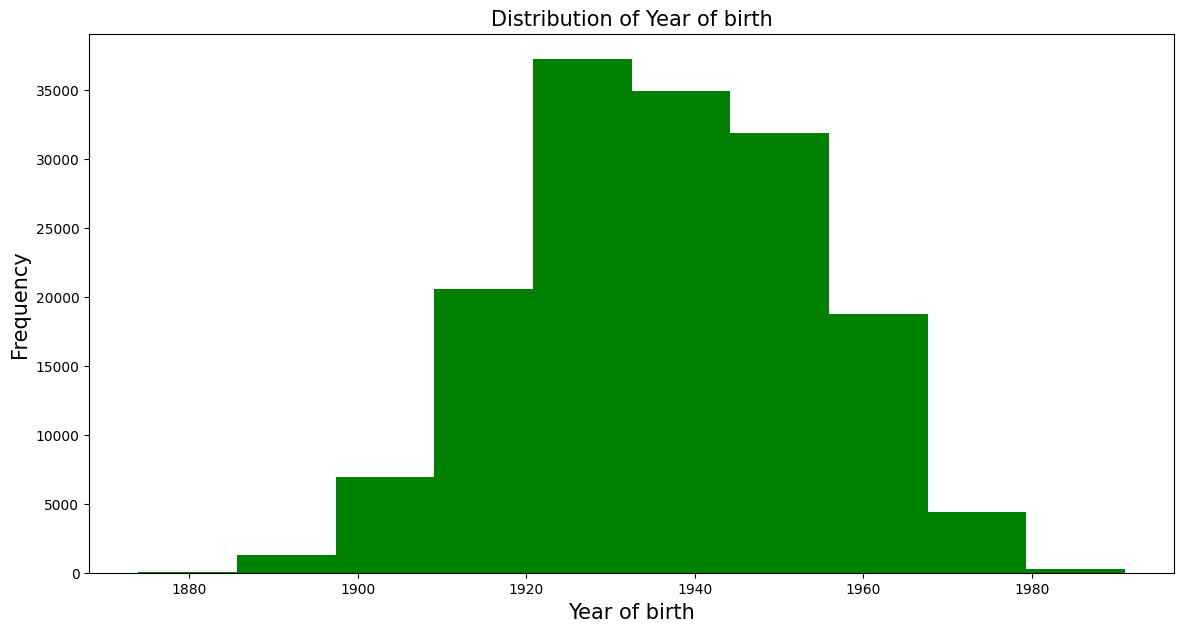

In [ ]:
# Histogram of 'Year of birth'
plt.figure(figsize = (14, 7))
plt.hist(df['Year of birth'], color = 'green')
plt.xlabel('Year of birth', fontsize = 15)
plt.ylabel('Frequency', fontsize = 15)
plt.title('Distribution of Year of birth', fontsize = 15)
plt.show()

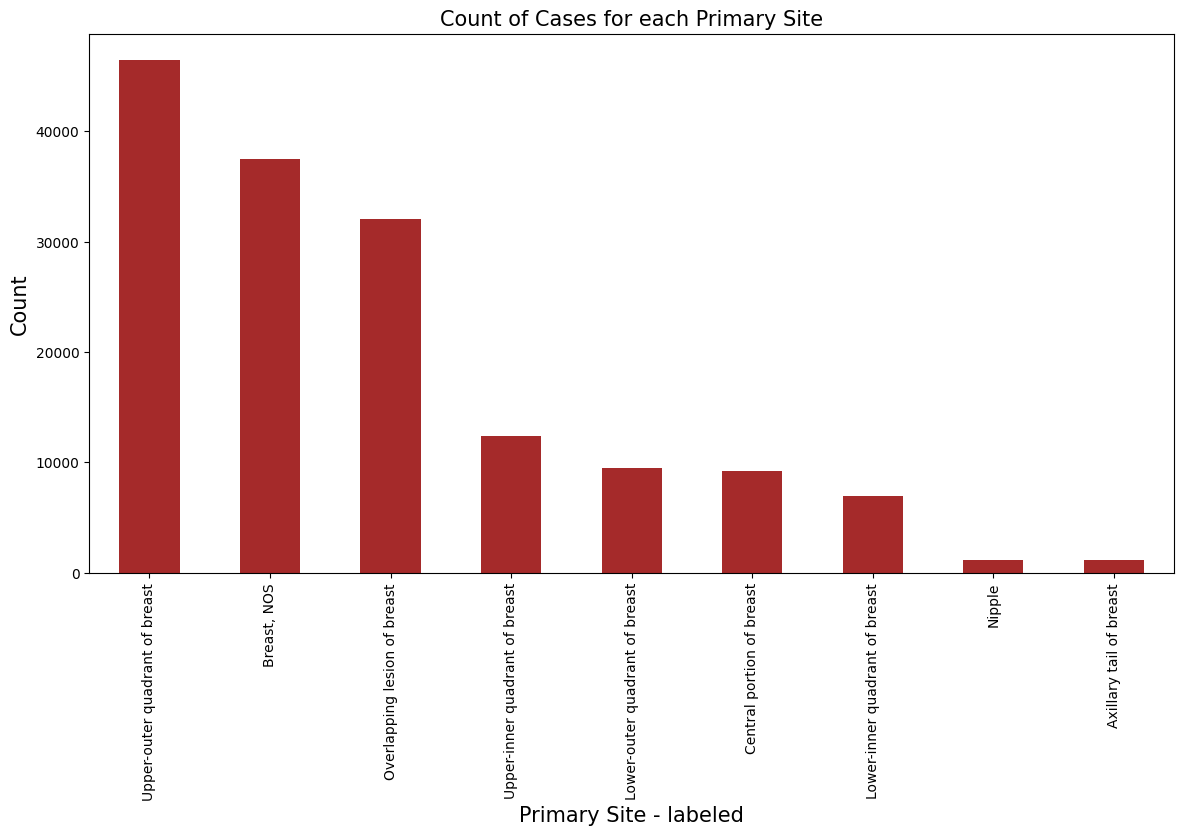

In [ ]:
#Bar chart of 'Primary Site - labeled:

#  Bar chart of 'Primary Site - labeled'
plt.figure(figsize = (14, 7))
df['Primary Site - labeled'].value_counts().plot(kind='bar', color = 'brown')
plt.xlabel('Primary Site - labeled', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.title('Count of Cases for each Primary Site', fontsize = 15)
plt.xticks(rotation=90)
plt.show()

# **Distribution of Survival Months:**

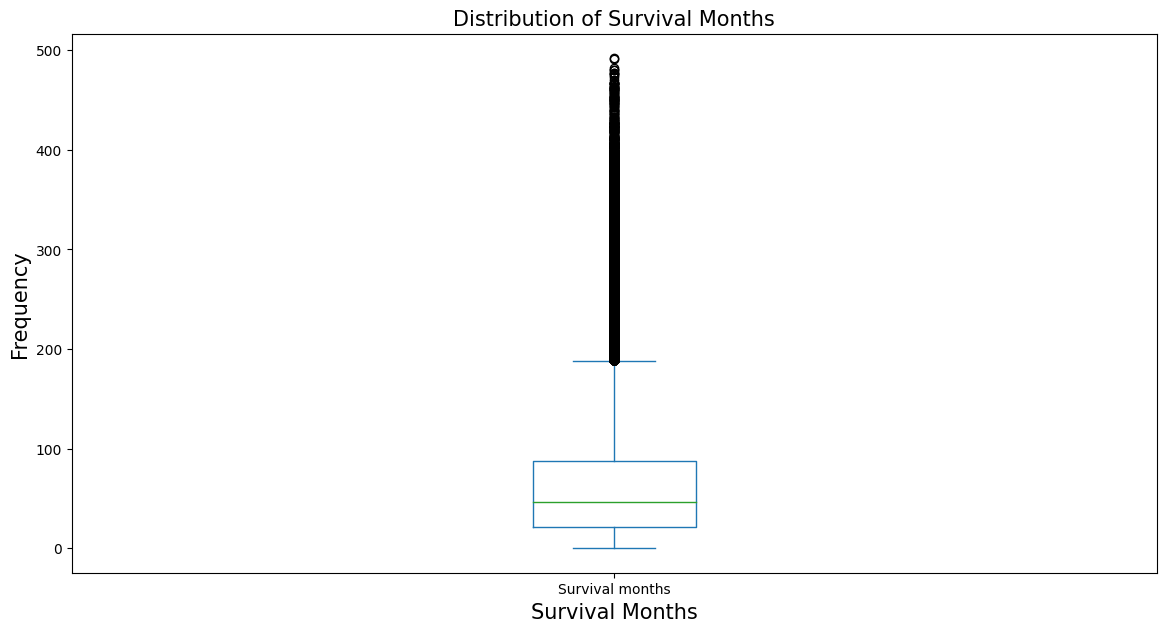

In [ ]:
plt.figure(figsize=(14, 7))
df['Survival months'].plot(kind = 'box')
plt.xlabel('Survival Months', fontsize = 15)
plt.ylabel('Frequency', fontsize = 15)
plt.title('Distribution of Survival Months', fontsize = 15)
plt.show()

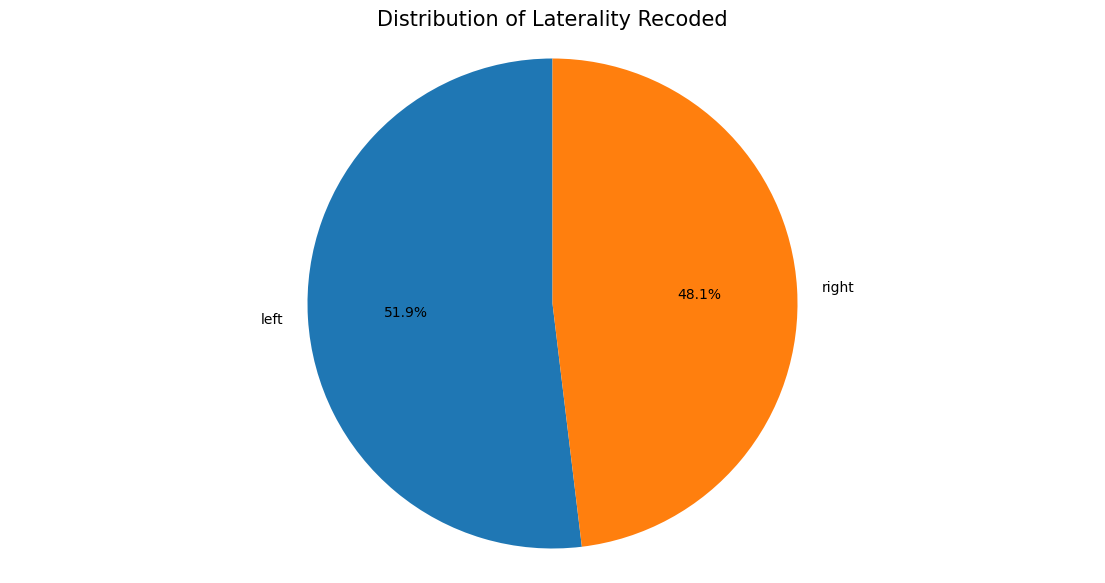

In [ ]:
#Pie chart to show the Distribution of Laterality Recoded:
plt.figure(figsize=(14, 7))
labels = df['Laterality Recoded'].value_counts().index
sizes = df['Laterality Recoded'].value_counts().values
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Distribution of Laterality Recoded', fontsize = 15)
plt.show()

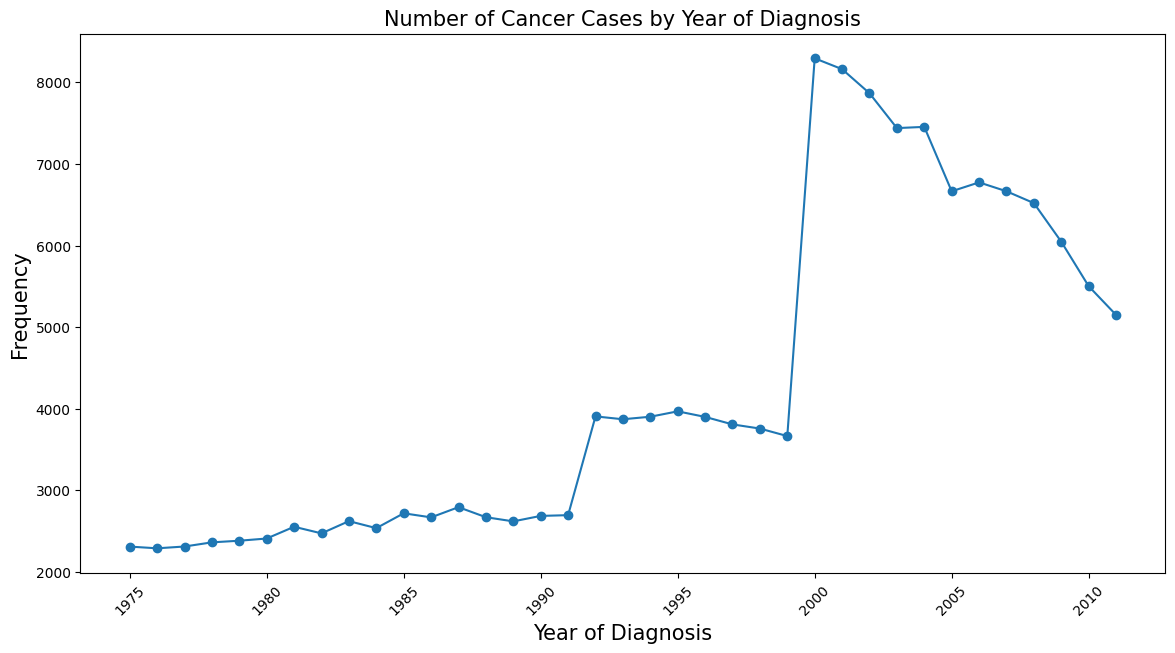

In [ ]:
#Line plot of 'Year of diagnosis:

# Line plot of 'Year of diagnosis'
plt.figure(figsize=(14, 7))
year_counts = df['Year of diagnosis'].value_counts().sort_index()
plt.plot(year_counts.index, year_counts.values, marker='o')
plt.xlabel('Year of Diagnosis', fontsize = 15)
plt.ylabel('Frequency', fontsize = 15)
plt.title('Number of Cancer Cases by Year of Diagnosis', fontsize = 15)
plt.xticks(rotation=45)
plt.show()

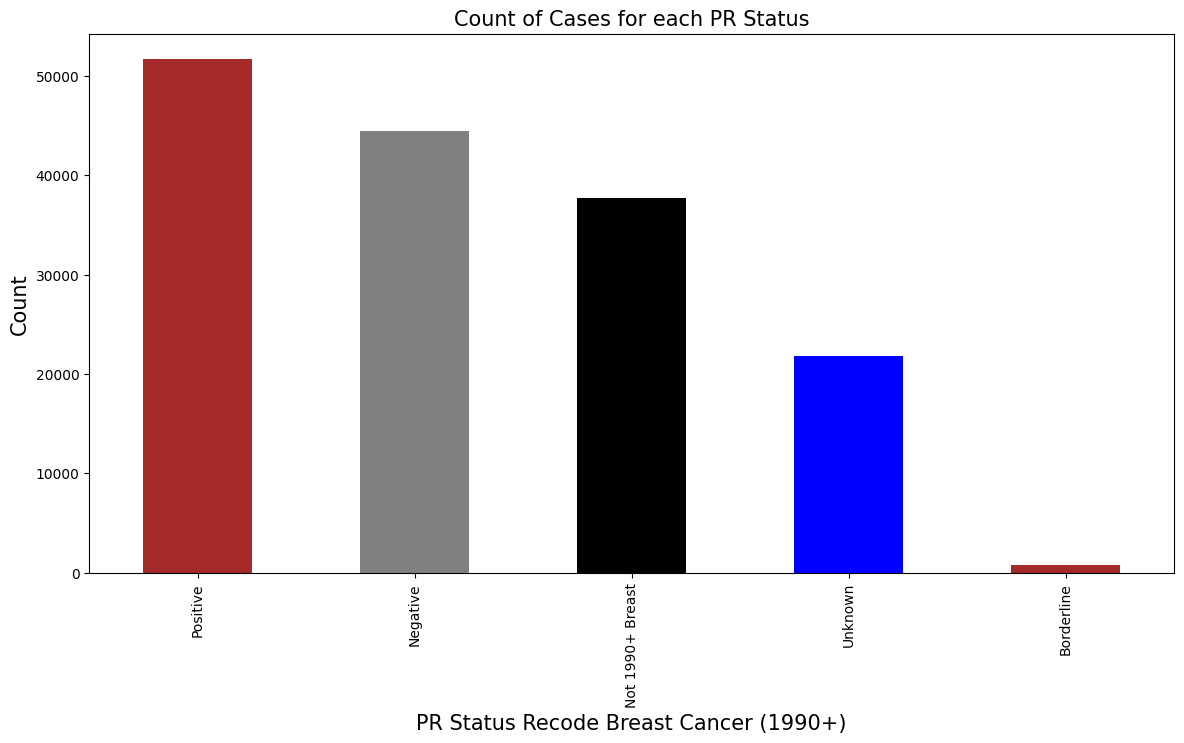

In [ ]:
#A bar graph to show the Count of Cases for each PR Status:
plt.figure(figsize=(14, 7))
df['PR Status Recode Breast Cancer (1990+)'].value_counts().plot(kind='bar', color = ['brown','gray','black','blue'])
plt.xlabel('PR Status Recode Breast Cancer (1990+)', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.title('Count of Cases for each PR Status', fontsize = 15)
plt.show()

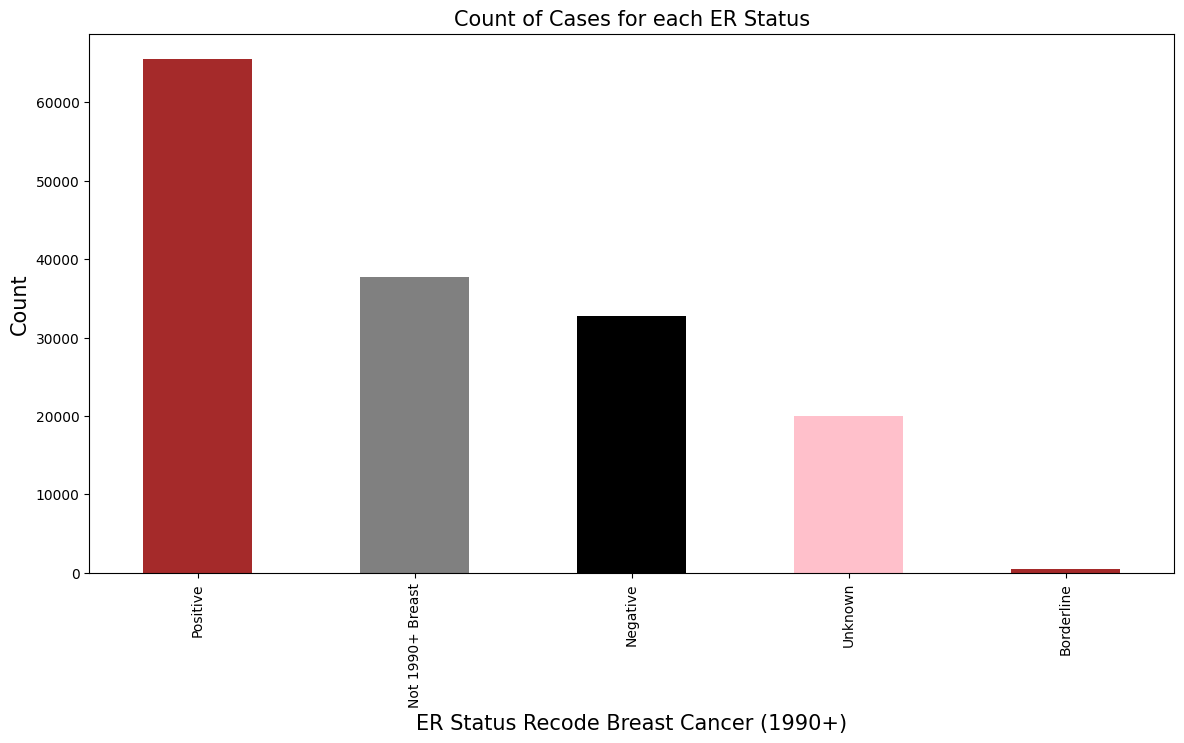

In [ ]:
#A bar graph to show the Count of Cases for each ER Status:

plt.figure(figsize=(14, 7))
df['ER Status Recode Breast Cancer (1990+)'].value_counts().plot(kind='bar',color = ['brown','gray','black','pink'])
plt.xlabel('ER Status Recode Breast Cancer (1990+)', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.title('Count of Cases for each ER Status', fontsize = 15)
plt.show()

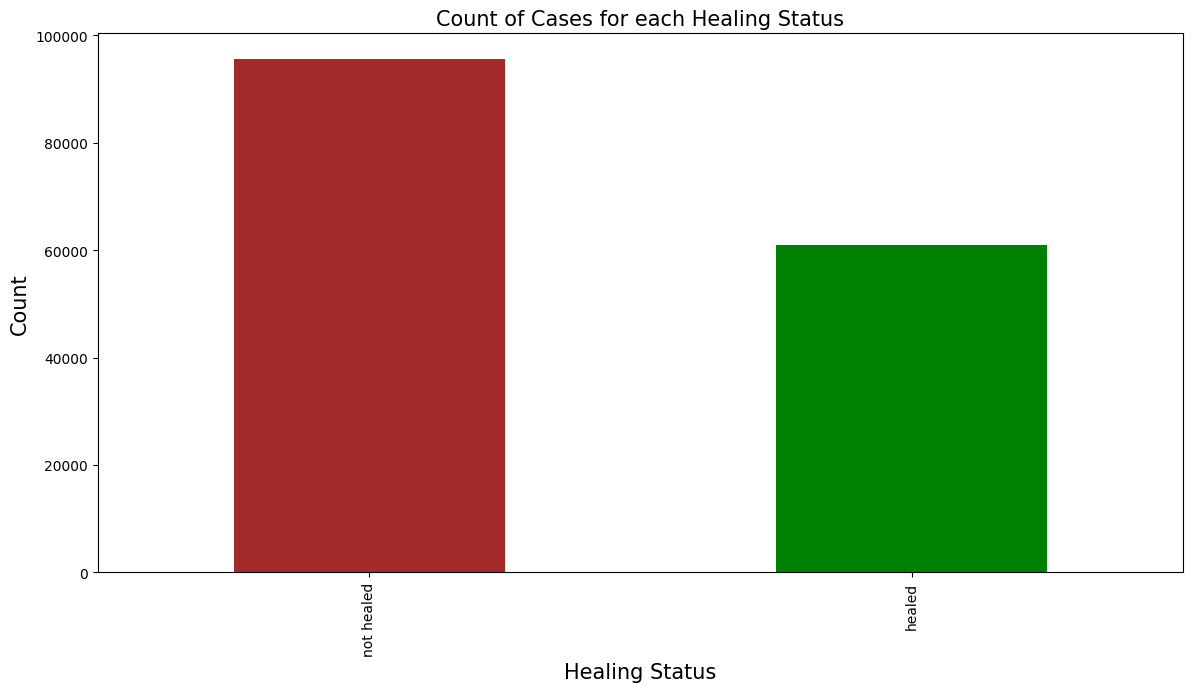

In [ ]:
#Count of Cases for each Healing Status (Response Variable):
plt.figure(figsize=(14, 7))
df['Healing Status'].value_counts().plot(kind='bar',color = ['brown','green',])
plt.xlabel('Healing Status', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.title('Count of Cases for each Healing Status', fontsize = 15)
plt.show()

# **Multivariate Analysis:**

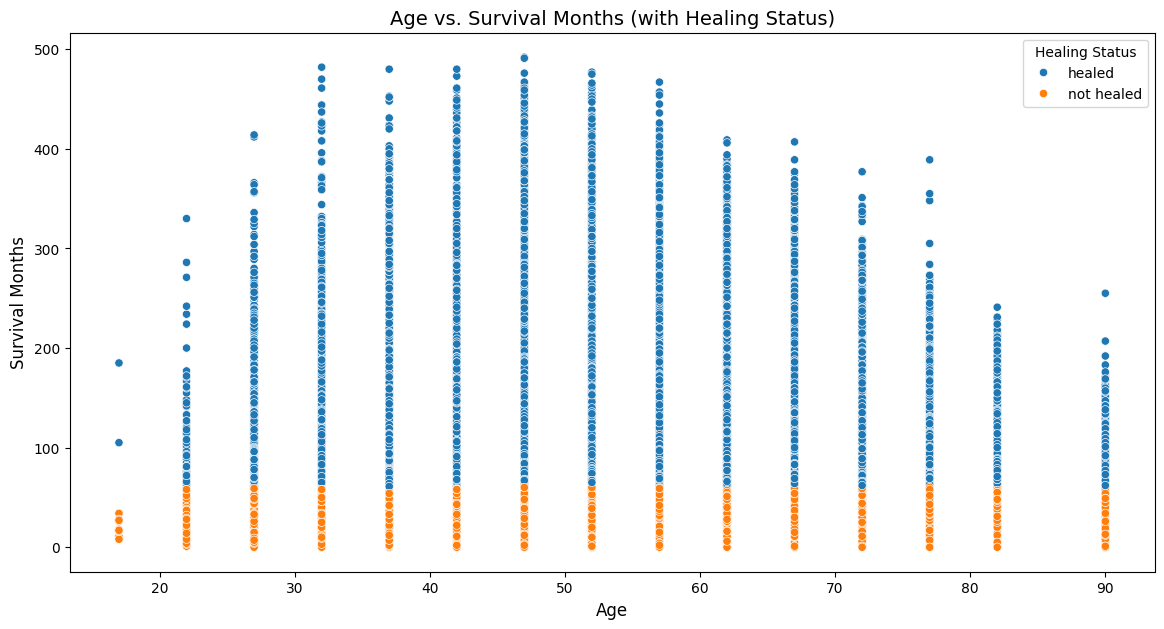

In [ ]:
#Scatter Plot (Age vs. Survival Months with Hue):
plt.figure(figsize=(14, 7))
sns.scatterplot(x='Age', y='Survival months', hue='Healing Status', data=df)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Survival Months', fontsize=12)
plt.title('Age vs. Survival Months (with Healing Status)', fontsize=14)
plt.show()

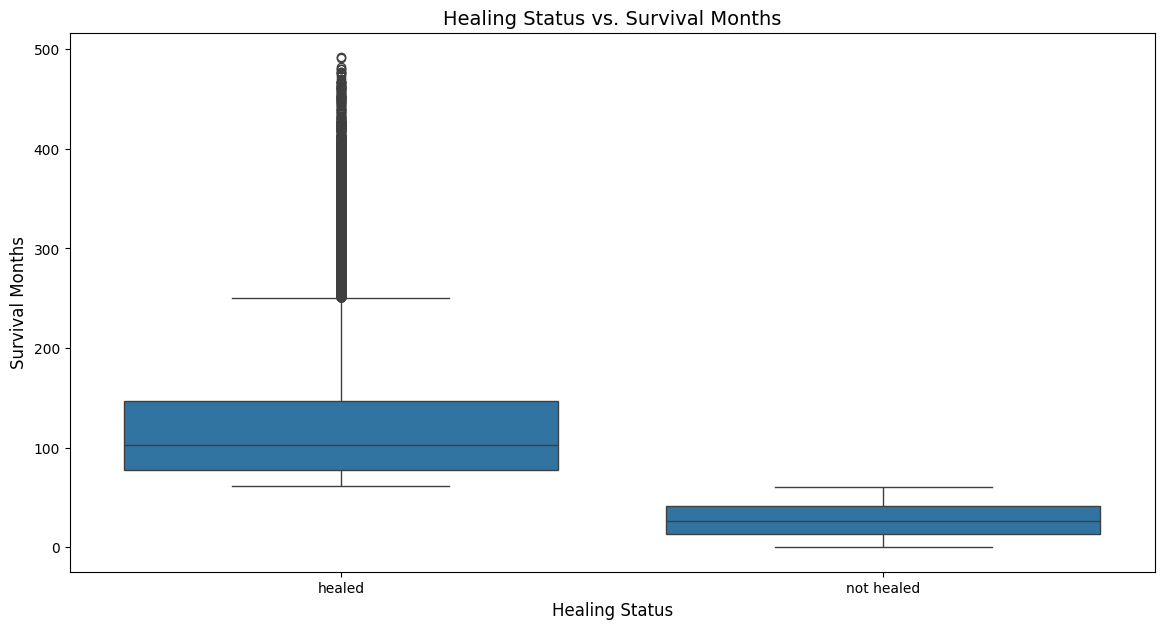

In [ ]:
#Box Plot (Healing Status vs. Survival Months):

plt.figure(figsize=(14, 7))
sns.boxplot(x='Healing Status', y='Survival months', data=df)
plt.xlabel('Healing Status', fontsize=12)
plt.ylabel('Survival Months', fontsize=12)
plt.title('Healing Status vs. Survival Months', fontsize=14)
plt.show()

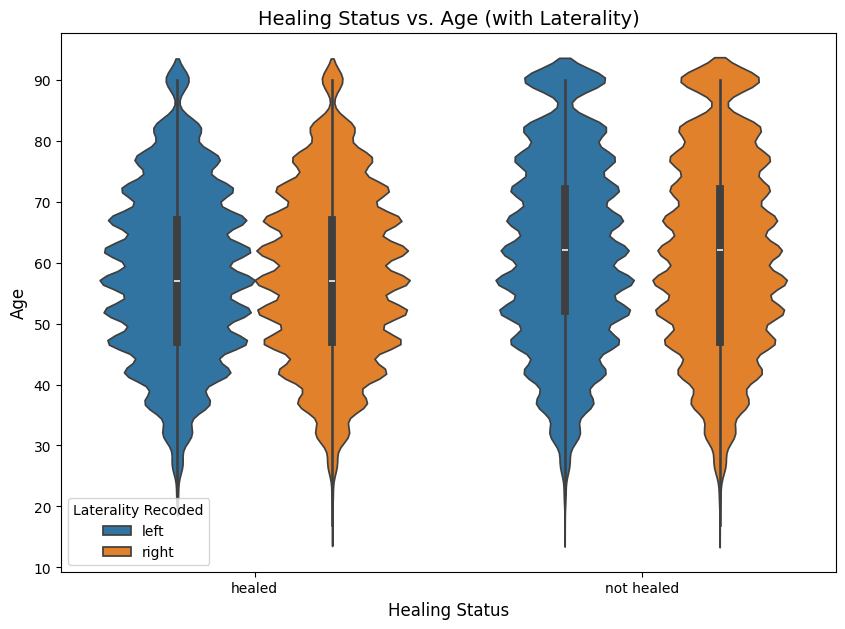

In [ ]:
#Violin plot to show Healing Status vs. Age (with Laterality):
plt.figure(figsize=(10, 7))
sns.violinplot(x='Healing Status', y='Age', hue='Laterality Recoded', data=df)
plt.xlabel('Healing Status', fontsize=12)
plt.ylabel('Age', fontsize=12)
plt.title('Healing Status vs. Age (with Laterality)', fontsize=14)
plt.show()

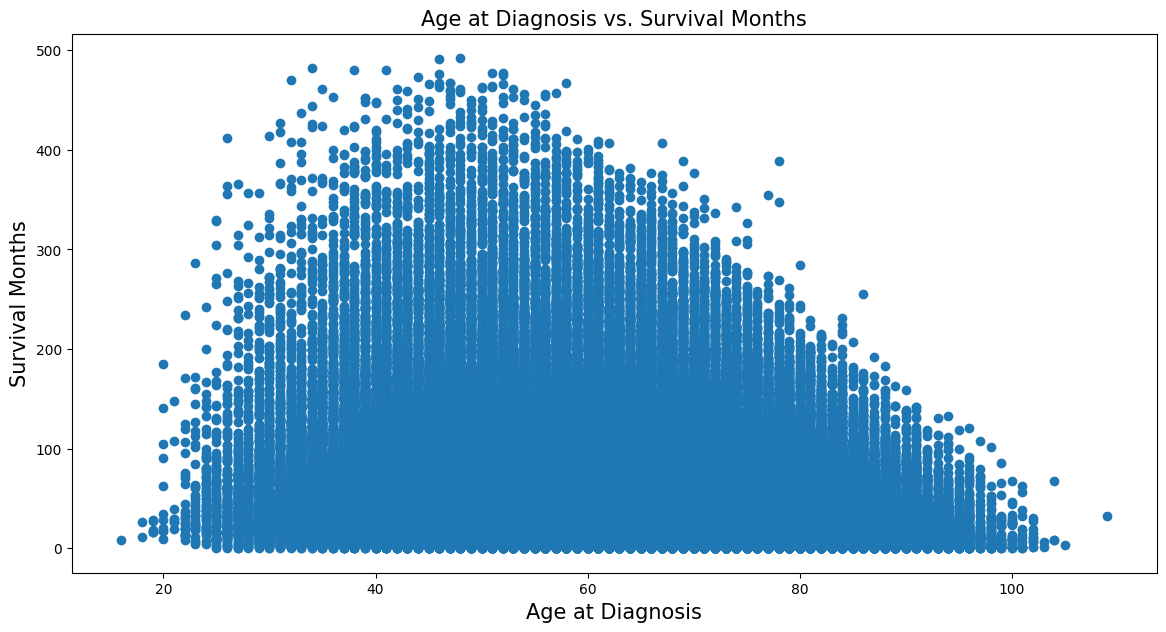

In [ ]:
#Scatter plot for Age at Diagnosis vs. Survival Months:
plt.figure(figsize=(14, 7))
plt.scatter(df['Age at Diagnosis'], df['Survival months'])
plt.xlabel('Age at Diagnosis', fontsize = 15)
plt.ylabel('Survival Months', fontsize = 15)
plt.title('Age at Diagnosis vs. Survival Months', fontsize = 15)
plt.show()

In [ ]:
#Drop the unnecesary Columns from the data frame :

df.drop(['Age recode with <1 year olds','Laterality','Reason no cancer-directed surgery','Survival months','Histology recode - broad groupings',], axis = 1, inplace = True)

<ipython-input-73-d60ebb9377e5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['Age recode with <1 year olds','Laterality','Reason no cancer-directed surgery','Survival months','Histology recode - broad groupings',], axis = 1, inplace = True)


In [ ]:
#Print the columns having object data type :
df.select_dtypes(include = 'object').columns

Index(['Sequence number', 'Primary Site - labeled',
       'ER Status Recode Breast Cancer (1990+)',
       'PR Status Recode Breast Cancer (1990+)',
       'Breast - Adjusted AJCC 6th T (1988-2015)',
       'Breast - Adjusted AJCC 6th N (1988-2015)',
       'Breast - Adjusted AJCC 6th M (1988-2015)',
       'Breast - Adjusted AJCC 6th Stage (1988-2015)', 'Laterality Recoded',
       'Healing Status', 'Surgery Performed'],
      dtype='object')

In [ ]:
#Assign numeric codes to the values of Laterality Recoded and Surgery Performed codes:

df['Laterality Recoded'] = df['Laterality Recoded'].astype('category').cat.codes
df['Surgery Performed'] = df['Surgery Performed'].astype('category').cat.codes

<ipython-input-75-ec4a22559d44>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Laterality Recoded'] = df['Laterality Recoded'].astype('category').cat.codes
<ipython-input-75-ec4a22559d44>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Surgery Performed'] = df['Surgery Performed'].astype('category').cat.codes


In [ ]:
#Get dummies variables for all the other remaining category type variables :
df_dummy = pd.get_dummies(df, columns = ['Sequence number', 'Primary Site - labeled',
       'ER Status Recode Breast Cancer (1990+)',
       'PR Status Recode Breast Cancer (1990+)',
       'Breast - Adjusted AJCC 6th T (1988-2015)',
       'Breast - Adjusted AJCC 6th N (1988-2015)',
       'Breast - Adjusted AJCC 6th M (1988-2015)',
       'Breast - Adjusted AJCC 6th Stage (1988-2015)', ])
df_dummy.head()

,Year of birth,Year of diagnosis,Age at Diagnosis,Age,Laterality Recoded,Healing Status,Surgery Performed,Sequence number_1st of 2 or more primaries,Sequence number_One primary only,Primary Site - labeled_Axillary tail of breast,...,Breast - Adjusted AJCC 6th Stage (1988-2015)_Blank(s),Breast - Adjusted AJCC 6th Stage (1988-2015)_I,Breast - Adjusted AJCC 6th Stage (1988-2015)_IIA,Breast - Adjusted AJCC 6th Stage (1988-2015)_IIB,Breast - Adjusted AJCC 6th Stage (1988-2015)_IIIA,Breast - Adjusted AJCC 6th Stage (1988-2015)_IIIB,Breast - Adjusted AJCC 6th Stage (1988-2015)_IIIC,Breast - Adjusted AJCC 6th Stage (1988-2015)_IIINOS,Breast - Adjusted AJCC 6th Stage (1988-2015)_IV,Breast - Adjusted AJCC 6th Stage (1988-2015)_UNK Stage
0,1910,1975,65,62,0,healed,1,False,True,False,...,True,False,False,False,False,False,False,False,False,False
1,1951,1990,39,37,1,not healed,1,False,True,False,...,False,True,False,False,False,False,False,False,False,False
2,1934,1991,57,57,0,not healed,1,False,True,False,...,False,False,False,False,False,False,False,False,False,True
3,1927,1989,62,62,1,not healed,1,False,True,False,...,False,False,False,True,False,False,False,False,False,False
4,1907,1982,75,72,0,healed,1,False,True,False,...,True,False,False,False,False,False,False,False,False,False


In [ ]:
#Store Features into 'X' matrix and Response into 'y' vector:

X = df_dummy.loc[:, df_dummy.columns != 'Healing Status']

y = df_dummy['Healing Status']

# **Feature Selection using SelectKbest Analysis:**

In [ ]:
#import SelectKBest and f_classif from sklear for feature seletion:

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

In [ ]:
#Initialized SelectKBest with f_classif test and k= 30

test = SelectKBest(score_func=f_classif, k=30)

In [ ]:
#Fit the SelectKBest model:
fit = test.fit(X, y)
fit

SelectKBest(k=30)

In [ ]:
#Transform the features:
filtered_features= fit.transform(X)

In [ ]:
#Show the supporting variables given by SelectKBest (True/false):

test.get_support()

array([False,  True,  True,  True, False,  True,  True,  True, False,
        True, False, False, False, False, False, False, False, False,
        True,  True,  True,  True, False,  True,  True,  True, False,
        True, False, False,  True,  True, False,  True, False, False,
        True, False,  True, False, False,  True, False, False,  True,
        True,  True,  True, False, False,  True,  True,  True, False,
       False,  True, False, False,  True, False])

In [ ]:
#Display the scores of the features assigned by the SelectkBest:

test.scores_

array([6.71479665e+00, 4.62762681e+03, 1.79139015e+03, 1.77880821e+03,
       3.18750503e+01, 1.08642529e+04, 6.37125833e+03, 6.37125833e+03,
       6.92444992e+00, 1.95423108e+03, 2.91444626e+00, 7.43879046e+01,
       1.22762128e+02, 1.29607933e+01, 1.02967070e+00, 2.69046555e+02,
       3.88546273e+02, 1.61903810e+01, 6.37122068e+03, 1.47940450e+03,
       2.18467842e+03, 4.68607692e+02, 8.52258478e+00, 5.54795215e+03,
       1.47940450e+03, 2.48250975e+03, 3.43492253e+02, 9.81051328e+03,
       1.29950493e+01, 3.45830301e+02, 1.64370296e+03, 3.65139503e+03,
       1.14473075e+02, 1.58426218e+03, 1.90738729e+02, 4.32384887e+01,
       7.25291007e+02, 5.01863882e+01, 7.96627729e+02, 9.93960962e+01,
       2.08838201e+00, 4.04767251e+03, 1.83461392e+01, 4.54807879e+01,
       1.71386008e+03, 2.00411660e+03, 1.01138950e+04, 9.81051328e+03,
       3.42394482e+02, 2.48163570e+00, 1.12905527e+03, 4.66665978e+03,
       1.00386367e+03, 8.49204447e+01, 2.04867298e+01, 8.75412760e+02,
      

In [ ]:
#Find the Feature importance for each feature:

feat_importances = pd.Series(test.scores_, index=X.columns)
feat_importances

Year of birth                                                  6.714797
Year of diagnosis                                           4627.626807
Age at Diagnosis                                            1791.390153
Age                                                         1778.808210
Laterality Recoded                                            31.875050
Surgery Performed                                          10864.252904
Sequence number_1st of 2 or more primaries                  6371.258334
Sequence number_One primary only                            6371.258334
Primary Site - labeled_Axillary tail of breast                 6.924450
Primary Site - labeled_Breast, NOS                          1954.231076
Primary Site - labeled_Central portion of breast               2.914446
Primary Site - labeled_Lower-inner quadrant of breast         74.387905
Primary Site - labeled_Lower-outer quadrant of breast        122.762128
Primary Site - labeled_Nipple                                 12

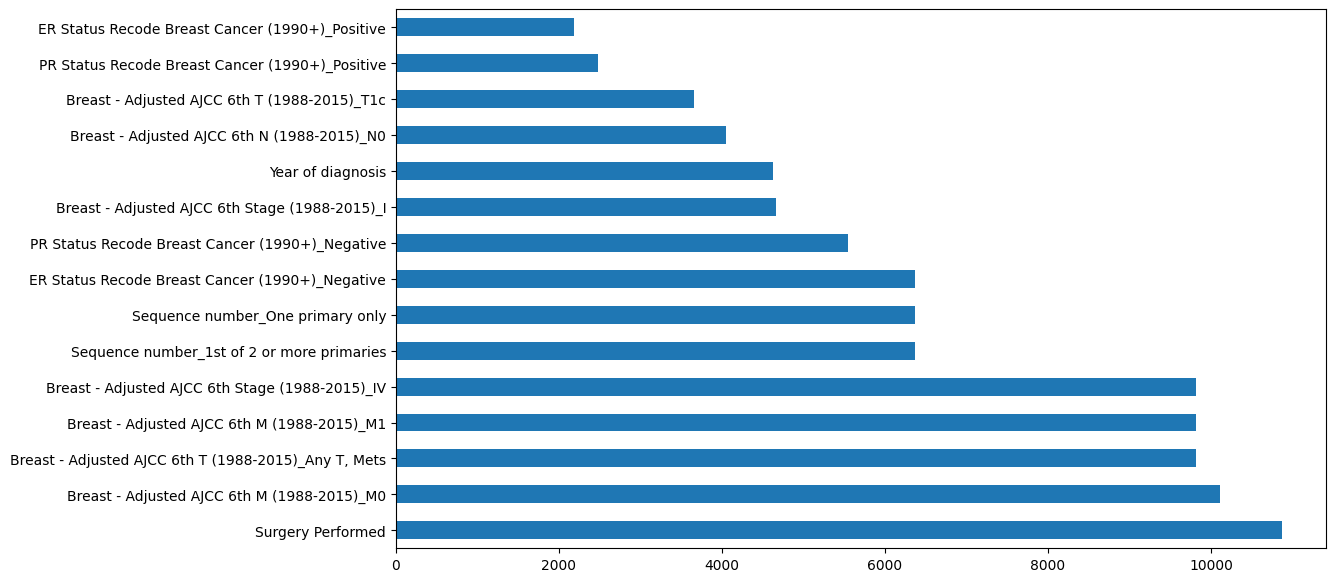

In [ ]:
#Display the feature importance using a bar chart:
feat_importances.nlargest(15).plot(kind='barh',figsize = (12,7))
plt.show()

In [ ]:
#Getting the column names:
column_names = X.columns[test.get_support()]
column_names

Index(['Year of diagnosis', 'Age at Diagnosis', 'Age', 'Surgery Performed',
       'Sequence number_1st of 2 or more primaries',
       'Sequence number_One primary only',
       'Primary Site - labeled_Breast, NOS',
       'ER Status Recode Breast Cancer (1990+)_Negative',
       'ER Status Recode Breast Cancer (1990+)_Not 1990+ Breast',
       'ER Status Recode Breast Cancer (1990+)_Positive',
       'ER Status Recode Breast Cancer (1990+)_Unknown',
       'PR Status Recode Breast Cancer (1990+)_Negative',
       'PR Status Recode Breast Cancer (1990+)_Not 1990+ Breast',
       'PR Status Recode Breast Cancer (1990+)_Positive',
       'Breast - Adjusted AJCC 6th T (1988-2015)_Any T, Mets',
       'Breast - Adjusted AJCC 6th T (1988-2015)_T1b',
       'Breast - Adjusted AJCC 6th T (1988-2015)_T1c',
       'Breast - Adjusted AJCC 6th T (1988-2015)_T2',
       'Breast - Adjusted AJCC 6th T (1988-2015)_T4b',
       'Breast - Adjusted AJCC 6th T (1988-2015)_T4d',
       'Breast - Adjusted

In [ ]:
#Selecting the relevant columns given by SelectKbest only:

X_Selectkbest = X[column_names]
X_Selectkbest.head()

,Year of diagnosis,Age at Diagnosis,Age,Surgery Performed,Sequence number_1st of 2 or more primaries,Sequence number_One primary only,"Primary Site - labeled_Breast, NOS",ER Status Recode Breast Cancer (1990+)_Negative,ER Status Recode Breast Cancer (1990+)_Not 1990+ Breast,ER Status Recode Breast Cancer (1990+)_Positive,...,Breast - Adjusted AJCC 6th N (1988-2015)_N0,Breast - Adjusted AJCC 6th N (1988-2015)_N3,Breast - Adjusted AJCC 6th N (1988-2015)_NX Adjusted,Breast - Adjusted AJCC 6th M (1988-2015)_M0,Breast - Adjusted AJCC 6th M (1988-2015)_M1,Breast - Adjusted AJCC 6th Stage (1988-2015)_Blank(s),Breast - Adjusted AJCC 6th Stage (1988-2015)_I,Breast - Adjusted AJCC 6th Stage (1988-2015)_IIA,Breast - Adjusted AJCC 6th Stage (1988-2015)_IIIB,Breast - Adjusted AJCC 6th Stage (1988-2015)_IV
0,1975,65,62,1,False,True,True,False,True,False,...,True,False,False,True,False,True,False,False,False,False
1,1990,39,37,1,False,True,False,False,False,True,...,True,False,False,True,False,False,True,False,False,False
2,1991,57,57,1,False,True,False,False,False,True,...,False,False,True,True,False,False,False,False,False,False
3,1989,62,62,1,False,True,False,False,True,False,...,False,False,False,True,False,False,False,False,False,False
4,1982,75,72,1,False,True,False,False,True,False,...,True,False,False,True,False,True,False,False,False,False


# **Handle Class Imbalance:**

#**SMOTE for Over Sampling to have equal number intances for Survival/ Headled (yes/no):**

In [ ]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE(random_state = 42)
X_res, y = oversample.fit_resample(X_Selectkbest, y)

In [ ]:
from collections import Counter
counter = Counter(y)
print(counter)

Counter({'healed': 95567, 'not healed': 95567})


In [ ]:
#Divide the dataset into training set and testing set (80 percent train and 20 percent test):
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_res, y, test_size=0.20, random_state=0)

In [ ]:
#Scaled the dataset using StandardScaler:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

# **Random Forest Classifier:**

In [ ]:
#Initialize the Random Forest Model :

RF_classifier =  RandomForestClassifier(n_estimators = 100, random_state = 42)

In [ ]:
#Fit the random forest model on training set:
RF_classifier.fit(X_train_scaled, y_train)

y_pred_rf = RF_classifier.predict(X_test_scaled)

In [ ]:
#Evaluate the Model using different KPIS (Accuracy, Confusion Matrix, and Classification Report):
accu_rf = accuracy_score(y_pred_rf, y_test)

# Print the prediction accuracy
print('Test Accuracy Random Forest Classifier :', accu_rf)

print('Confuion Matrix Random Forest Classifier :\n', confusion_matrix(y_pred_rf, y_test))

print('Classification Report Random Forest Classifier :', classification_report(y_pred_rf, y_test))

Test Accuracy Random Forest Classifier : 0.7100740314437439
Confuion Matrix Random Forest Classifier :
 [[14356  6450]
 [ 4633 12788]]
Classification Report Random Forest Classifier :               precision    recall  f1-score   support

      healed       0.76      0.69      0.72     20806
  not healed       0.66      0.73      0.70     17421

    accuracy                           0.71     38227
   macro avg       0.71      0.71      0.71     38227
weighted avg       0.71      0.71      0.71     38227



# **K-Nearest Neighbour CLassifier:**

In [ ]:
#Initialize the K-Nearest Neighbour CLassifier :
Knn_classifier = KNeighborsClassifier(n_neighbors=5, )

In [ ]:
#Fit the K-Nearest Neighbour CLassifier on training set:
Knn_classifier.fit(X_train_scaled, y_train)

y_pred_knn = Knn_classifier.predict(X_test_scaled)

In [ ]:
#Evaluate the Model using different KPIS (Accuracy, Confusion Matrix, and Classification Report):
accu_knn = accuracy_score(y_pred_knn, y_test)

print('Test accuracy K-nearest Neighbour Classifier :', accu_knn)

print('Confuion Matrix K-nearest Neighbour Classifier :\n', confusion_matrix(y_pred_knn, y_test))

print('Classification Report K-nearest Neighbour Classifier :', classification_report(y_pred_knn, y_test))

Test accuracy K-nearest Neighbour Classifier : 0.7004473278049547
Confuion Matrix K-nearest Neighbour Classifier :
 [[13939  6401]
 [ 5050 12837]]
Classification Report K-nearest Neighbour Classifier :               precision    recall  f1-score   support

      healed       0.73      0.69      0.71     20340
  not healed       0.67      0.72      0.69     17887

    accuracy                           0.70     38227
   macro avg       0.70      0.70      0.70     38227
weighted avg       0.70      0.70      0.70     38227



# **Gradient Boosting Classifier:**

In [ ]:
#Initialize the Gradient Boosting Classifier :
GBC_classifier = GradientBoostingClassifier(n_estimators=200)

In [ ]:
#Fit the Gradient Boosting Classifier model on training set:
GBC_classifier.fit(X_train_scaled, pd.Series(y_train).astype('category').cat.codes)

y_pred_GBC = GBC_classifier.predict(X_test_scaled)

In [ ]:
#Evaluate the Model using different KPIS (Accuracy, Confusion Matrix, and Classification Report):
accu_GBC = accuracy_score(y_pred_GBC, pd.Series(y_test).astype('category').cat.codes)

# Print the prediction accuracy
print('Test Accuracy GBC Classifier :', accu_GBC)

print('Confuion Matrix GBC Classifier :\n', confusion_matrix(y_pred_GBC,  pd.Series(y_test).astype('category').cat.codes))

print('Classification Report GBC Classifier :', classification_report(y_pred_GBC, pd.Series(y_test).astype('category').cat.codes))

Test Accuracy GBC Classifier : 0.7263975723964737
Confuion Matrix GBC Classifier :
 [[15179  6649]
 [ 3810 12589]]
Classification Report GBC Classifier :               precision    recall  f1-score   support

           0       0.80      0.70      0.74     21828
           1       0.65      0.77      0.71     16399

    accuracy                           0.73     38227
   macro avg       0.73      0.73      0.73     38227
weighted avg       0.74      0.73      0.73     38227



# **XGB Classifier:**

In [ ]:
#Initialize the XGB Classifier Model :
XGB_classifier = XGBClassifier()

In [ ]:
#Fit the XGB Classifier on training set:

XGB_classifier.fit(X_train_scaled, pd.Series(y_train).astype('category').cat.codes)

y_pred_XGB = XGB_classifier.predict(X_test_scaled)

In [ ]:
#Evaluate the Model using different KPIS (Accuracy, Confusion Matrix, and Classification Report):

accu_XGB = accuracy_score(y_pred_XGB, pd.Series(y_test).astype('category').cat.codes)

# Print the prediction accuracy
print('Test Accuracy XGB Classifier :', accu_XGB)

print('Confuion Matrix XGB Classifier :\n', confusion_matrix(y_pred_XGB, pd.Series(y_test).astype('category').cat.codes))

print('Classification Report XGB Classifier :', classification_report(y_pred_XGB, pd.Series(y_test).astype('category').cat.codes))


Test Accuracy XGB Classifier : 0.4990974965338635
Confuion Matrix XGB Classifier :
 [[18951 19110]
 [   38   128]]
Classification Report XGB Classifier :               precision    recall  f1-score   support

           0       1.00      0.50      0.66     38061
           1       0.01      0.77      0.01       166

    accuracy                           0.50     38227
   macro avg       0.50      0.63      0.34     38227
weighted avg       0.99      0.50      0.66     38227



# **AdaBoost Classifier:**

In [ ]:
#Initialize the AdaBoost Classifier Model :
ADC_classifier = AdaBoostClassifier(n_estimators= 5)

In [ ]:
#Fit the AdaBoost Classifie model on training set:
ADC_classifier.fit(X_train_scaled, pd.Series(y_train).astype('category').cat.codes)

y_pred_ADC = ADC_classifier.predict(X_test_scaled)


In [ ]:
#Evaluate the Model using different KPIS (Accuracy, Confusion Matrix, and Classification Report):
accu_ADC = accuracy_score(y_pred_ADC, pd.Series(y_test).astype('category').cat.codes)

# Print the prediction accuracy
print('Test Accuracy ADC Classifier :', accu_ADC)

print('Confuion Matrix ADC Classifier :\n', confusion_matrix(y_pred_ADC, pd.Series(y_test).astype('category').cat.codes))

print('Classification Report ADC Classifier :', classification_report(y_pred_ADC, pd.Series(y_test).astype('category').cat.codes))

Test Accuracy ADC Classifier : 0.6909514217699532
Confuion Matrix ADC Classifier :
 [[15410  8235]
 [ 3579 11003]]
Classification Report ADC Classifier :               precision    recall  f1-score   support

           0       0.81      0.65      0.72     23645
           1       0.57      0.75      0.65     14582

    accuracy                           0.69     38227
   macro avg       0.69      0.70      0.69     38227
weighted avg       0.72      0.69      0.70     38227



# **Model Performance Comparisions:**

In [ ]:
#Make two lists for the accuracies and models names
Default_Accuracies = pd.Series([accu_rf, accu_knn, accu_GBC, accu_XGB, accu_ADC, ])
Model_Names = ['RandomForestClassifier','KNeighborsClassifier','GradientBoostingClassifier','XGBClassifier', 'AdaBoostClassifier']

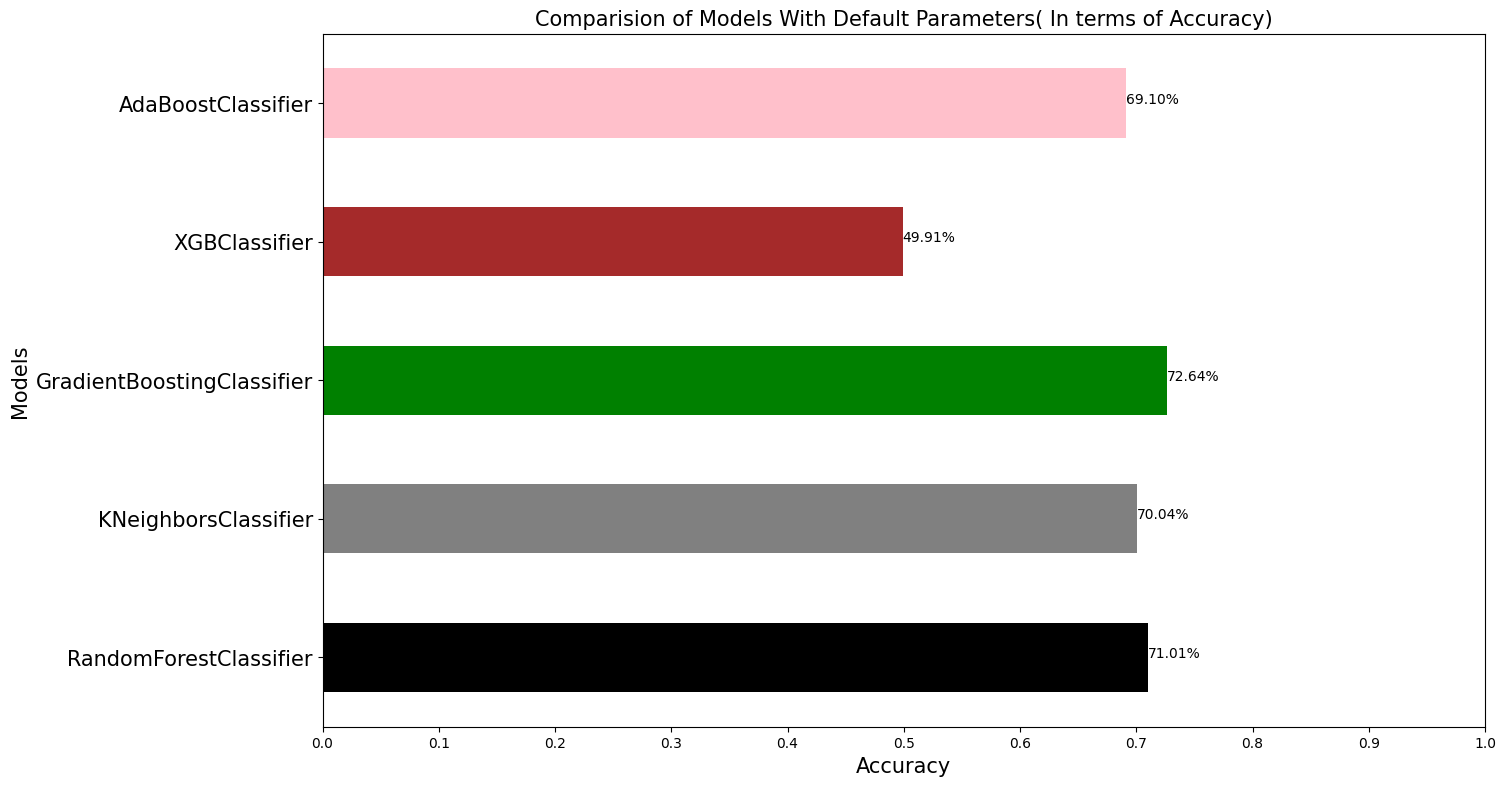

In [ ]:
#Comparision of Models With Default Parameters( In terms of Accuracy:)
ax = Default_Accuracies.plot(kind = 'barh',figsize=(15,9),color=['black','gray','green','brown','pink','yellow','blue','red'])
ax.set_title('Comparision of Models With Default Parameters( In terms of Accuracy)',fontsize=15)
ax.set_xticks([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])
ax.set_yticklabels(Model_Names,fontsize=15,)
ax.set_ylabel("Models",fontsize=15)
ax.set_xlabel("Accuracy",fontsize=15)
[ax.text(v, i, '{:.2f}%'.format(100*v)) for i, v in enumerate(Default_Accuracies)];
plt.show()

# **NearMiss1**

In [ ]:
from imblearn.under_sampling import NearMiss
from sklearn.model_selection import train_test_split


In [ ]:
# Split your data
#Divide the dataset into training set and testing set (80 percent train and 20 percent test):
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_res, y, test_size=0.20, random_state=0)


In [ ]:
# # Initializing NearMiss with version 1
nm = NearMiss(version=1)
X_train_res, y_train_res = nm.fit_resample(X_train, y_train)


In [ ]:
# Checking the class distribution after resampling
from collections import Counter
print("Class distribution after NearMiss Version 1:", Counter(y_train_res))

Class distribution after NearMiss Version 1: Counter({'healed': 76329, 'not healed': 76329})
